## Homework 2

### 1) Import Boston Dataset from sklearn dataset class.

In [40]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 2) Explore and analyse raw data.

In [42]:
X, y = load_boston(return_X_y = True)

In [43]:
boston_df = pd.DataFrame(X, columns=load_boston().feature_names)

In [44]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [46]:
boston_df.describe() #because continuous values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [48]:
corr = boston_df.corr()

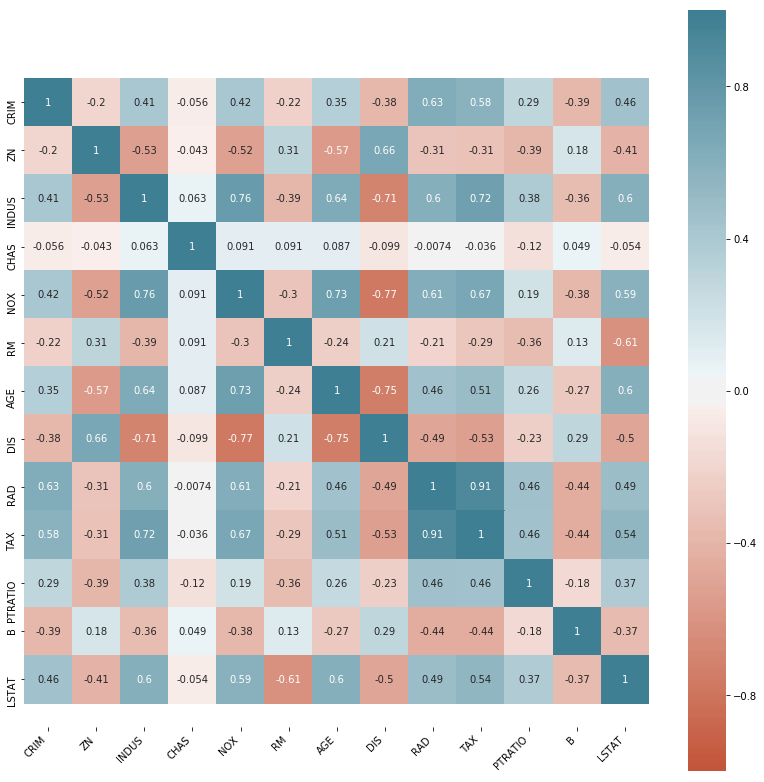

In [49]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

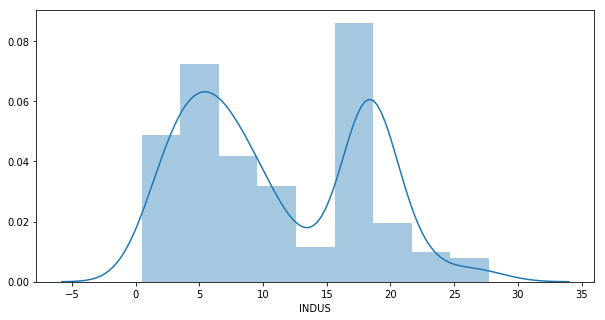

In [86]:
plt.figure(figsize=(10, 5))
sns.distplot(boston_df["INDUS"])

### 3) Do preprocessing for regression.

In [50]:
boston_df.isna().sum() #to check for null values in each column/feature

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [87]:
boston_df = boston_df.drop(["AGE","INDUS"],axis=1)

In [88]:
# Outlier detection with Z-Score
z = np.abs(stats.zscore(boston_df))
z

array([[0.41978194, 0.28482986, 0.27259857, ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.27259857, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.27259857, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.27259857, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.27259857, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.27259857, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [89]:
len(np.where(z > 3)[0])

100

In [90]:
outliers = list(set(np.where(z > 3)[0]))
new_df = boston_df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
5,5,0.02985,0.0,0.0,0.458,6.430,6.0622,3.0,222.0,18.7,394.12,5.21
6,6,0.08829,12.5,0.0,0.524,6.012,5.5605,5.0,311.0,15.2,395.60,12.43
7,7,0.14455,12.5,0.0,0.524,6.172,5.9505,5.0,311.0,15.2,396.90,19.15
8,8,0.21124,12.5,0.0,0.524,5.631,6.0821,5.0,311.0,15.2,386.63,29.93
9,9,0.17004,12.5,0.0,0.524,6.004,6.5921,5.0,311.0,15.2,386.71,17.10


415

In [91]:
X_new = new_df.drop('index', axis = 1)

X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.50009668,  0.42727822,  0.        , ..., -1.48379449,
         0.43991388, -1.1282211 ],
       [-0.49580542, -0.48858069,  0.        , ..., -0.312853  ,
         0.43991388, -0.48493501],
       [-0.49580951, -0.48858069,  0.        , ..., -0.312853  ,
         0.36091635, -1.27512537],
       ...,
       [-0.4889668 , -0.48858069,  0.        , ...,  1.18595212,
         0.43991388, -1.02616129],
       [-0.47898384, -0.48858069,  0.        , ...,  1.18595212,
         0.37295037, -0.89626698],
       [-0.49169611, -0.48858069,  0.        , ...,  1.18595212,
         0.43991388, -0.67977647]])

### 4) Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.3, random_state=42)

### 5) Try Ridge and Lasso Regression models with at least 5 different alpha value for each.

In [93]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [97]:
alphas = [10, 1, 0.1, 0.01, 0.001]

#### Ridge Regression

In [98]:
for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    print("Alpha Value: ", alpha)
    print("Ridge model coef: ", ridge_model.coef_)
    print("Ridge Train: ", ridge_model.score(X_train, y_train))
    print("Ridge Test: ", ridge_model.score(X_test, y_test))
    print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("----------------------------------------------")
    print("")

Alpha Value:  10
Ridge model coef:  [-0.43969537 -0.19076664  0.         -1.33315395  3.59412028 -1.68702131
  0.92366406 -1.28023946 -1.88571413  0.11311153 -2.5079215 ]
Ridge Train:  0.7552539987371736
Ridge Test:  0.6756525461276864
Mean Squared Error:  4.302738473336822
----------------------------------------------

Alpha Value:  1
Ridge model coef:  [-0.54380224 -0.18047804  0.         -1.55404967  3.62903384 -1.92148551
  1.32264571 -1.54051904 -1.96708292  0.07841565 -2.51446474]
Ridge Train:  0.7562289575294938
Ridge Test:  0.6776050934584954
Mean Squared Error:  4.28976784196351
----------------------------------------------

Alpha Value:  0.1
Ridge model coef:  [-0.55953073 -0.17742551  0.         -1.58094544  3.63068102 -1.95039865
  1.37893303 -1.57846318 -1.97640008  0.07406641 -2.51367078]
Ridge Train:  0.7562434148937173
Ridge Test:  0.6778718503836705
Mean Squared Error:  4.2879927486474765
----------------------------------------------

Alpha Value:  0.01
Ridge model 

#### Lasso Regression

In [99]:
for alpha in alphas:
    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    
    print("Alpha Value: ", alpha)
    print("Ridge model coef: ", lasso_model.coef_)
    print("Ridge Train: ", lasso_model.score(X_train, y_train))
    print("Ridge Test: ", lasso_model.score(X_test, y_test))
    print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("----------------------------------------------")
    print("")

Alpha Value:  10
Ridge model coef:  [-0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.]
Ridge Train:  0.0
Ridge Test:  -0.00629193402067596
Mean Squared Error:  7.5788218599449895
----------------------------------------------

Alpha Value:  1
Ridge model coef:  [-0.         -0.          0.         -0.          3.35031232 -0.
 -0.         -0.34289452 -1.05637843  0.         -2.29076213]
Ridge Train:  0.7027683749746343
Ridge Test:  0.6405544439918718
Mean Squared Error:  4.529562563281148
----------------------------------------------

Alpha Value:  0.1
Ridge model coef:  [-0.03725638 -0.1039098   0.         -1.00601914  3.73791937 -1.44684166
  0.         -0.7736161  -1.69890696  0.05814646 -2.59139346]
Ridge Train:  0.7506779003839736
Ridge Test:  0.66011759586407
Mean Squared Error:  4.404575351259586
----------------------------------------------

Alpha Value:  0.01
Ridge model coef:  [-0.5070275  -0.16995494  0.         -1.52622583  3.64225817 -1.90278781
  1.23992836 -1.49689398 -1.949

### 6) Evaluate the results of all models and choose the best performing model.

I created **for loops** to go though different **Alpha Values** for **Ridge** and **Lasso Regression** respectively to see how the different values would perform.  

Best performing models were both _Ridge Regression & Lasso Regression_ with an alpha of _0.001_. Result on the train score of _0.7562_, and on the test score of of _0.6777_. The model currently seems to have some underfitting. 